In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Define feature engineering function
def add_new_features(df):
    # Original features
    df['Risk_Score'] = (2 * df['SMOKING']) + (1.5 * df['ALCOHOL CONSUMING']) + df['CHRONIC DISEASE']
    df['Age_Smoking_Interaction'] = df['AGE'] * df['SMOKING']
    df['Chronic_Health_Score'] = df['CHRONIC DISEASE'] + df.get('SHORTNESS OF BREATH', 0) + df.get('WHEEZING', 0)
    df['Symptom_Severity'] = df['COUGHING'] + df['SHORTNESS OF BREATH'] + df['WHEEZING']
    df['Age_Risk_Ratio'] = df['AGE'] / (df['Risk_Score'] + 1)

    # New features based on lung cancer risk factors
    df['Smoking_Alcohol_Combined'] = df['SMOKING'] * df['ALCOHOL CONSUMING']  # Interaction of smoking and alcohol
    df['Age_Symptom_Index'] = df['AGE'] * df['Symptom_Severity'] / (df['AGE'].max() + 1)  # Age-weighted symptoms
    df['Chronic_Symptom_Risk'] = df['CHRONIC DISEASE'] * df['Symptom_Severity']  # Combined chronic and symptom effect
    df['Breathing_Difficulty_Score'] = df['SHORTNESS OF BREATH'] + df['WHEEZING']  # Aggregate breathing issues
    df['Lifestyle_Health_Ratio'] = (df['SMOKING'] + df['ALCOHOL CONSUMING']) / (df['CHRONIC DISEASE'] + 1)  # Lifestyle vs. health

    return df

# Function to calculate and visualize feature importance
def plot_feature_importance(df, target_col='LUNG_CANCER'):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Train a simple Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Get feature importance
    importances = rf.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importance Scores')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.savefig('../results/eda_visualizations/IT24101347/feature_importance.png')
    plt.show()
    
    print("Feature Importance Scores:\n", importance_df)



In [3]:
# Load the dataset
df = pd.read_csv('../results/outputs/outlier_removed_data.csv')
print("Original dataset head:\n", df.head())

# Add new features
df = add_new_features(df)
print("Dataset head after adding new features:\n", df.head())



Original dataset head:
    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0   69        1               0        0              1   
1       0   71        1               1        0              0   
2       0   61        1               0        0              1   
3       0   55        1               1        0              1   
4       1   56        1               0        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         0                  1         1   
1                1         0         1         1                  0         0   
2                1         0         1         1                  0         0   
3                0         0         0         1                  1         0   
4                0         1         1         1                  1         0   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0            

C:\Users\User\AppData\Local\Temp\ipykernel_33028\171572801.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


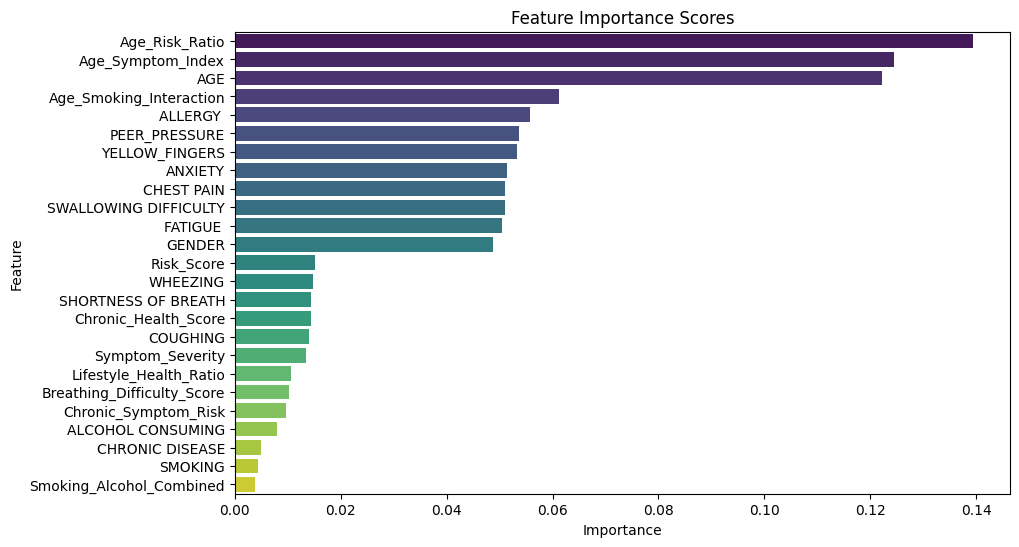

Feature Importance Scores:
                        Feature  Importance
19              Age_Risk_Ratio    0.139412
21           Age_Symptom_Index    0.124400
1                          AGE    0.122296
16     Age_Smoking_Interaction    0.061154
8                     ALLERGY     0.055806
5                PEER_PRESSURE    0.053690
3               YELLOW_FINGERS    0.053191
4                      ANXIETY    0.051302
14                  CHEST PAIN    0.051107
13       SWALLOWING DIFFICULTY    0.050951
7                     FATIGUE     0.050542
0                       GENDER    0.048836
15                  Risk_Score    0.015179
9                     WHEEZING    0.014689
12         SHORTNESS OF BREATH    0.014412
17        Chronic_Health_Score    0.014409
11                    COUGHING    0.013971
18            Symptom_Severity    0.013421
24      Lifestyle_Health_Ratio    0.010660
23  Breathing_Difficulty_Score    0.010155
22        Chronic_Symptom_Risk    0.009577
10           ALCOHOL CONSU

In [4]:
# Visualize feature importance
plot_feature_importance(df)

# Save the processed dataset for the next step
df.to_csv('../results/outputs/engineered_features_data.csv', index=False)
print("Saved to '../results/outputs/engineered_features_data.csv'")